# Capstone Project, Question 3

In the staining dataset, is the set of analyzed immunohistochemical markers a potential confounding factor? We will use principle component analysis to investigate this. The set of markers analyzed in the different tumor types will be tested by replacing in each tumor sample the immunohistochemical scores with a binary constant, indicating whether the marker has been analyzed or not. Then, we can graph the first two components to see if there is clustering of the data by tumor type.

In [94]:
import pandas as pd

#Read in the tidy imputed dataset
staining = pd.read_csv('data/pcbilDataImputed.csv')

staining.head()

,ck5,ck7,ck17,ck18,ck19,ck20,vim,muc1,muc2,muc5ac,...,cdx2,p53,p63,ki67,smad4,chra,cd56,cd10,clin_diag,pad
0,0.000000,92.5,20.000000,92.5,92.5,0.0,5.0,20.0,0.0,80.0,...,20.0,10.0,0.000000,20.0,0.000000,0.0,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|397
1,0.000000,20.0,0.000000,92.5,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,30.0,90.000000,0.0,0.0000,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|190
2,0.000000,92.5,0.000000,92.5,92.5,20.0,0.0,40.0,0.0,80.0,...,70.0,80.0,0.111111,40.0,70.000000,2.5,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|25
3,0.714286,70.0,18.333333,92.5,85.0,5.0,15.0,80.0,0.0,40.0,...,40.0,95.0,2.142857,30.0,42.500000,0.0,10.0000,9.166667,Gallbladder cancer,Gallbladder Ac|108
4,0.000000,0.0,0.000000,92.5,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,10.0,58.778626,0.0,11.5625,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|336


In [95]:
#check the size
staining.shape

(409, 29)

In [109]:
import matplotlib.pyplot as plt

# Here we are going to set up a dictionary that maps from tumor type ('clin_diag') to plotting colors

set_of_tumor_type = set( staining['clin_diag'] ) # get rid of duplicates in the species column
set_of_tumor_type

{'Ampullary carcinoma',
 'Distal bile duct cancer',
 'Ductal pancreatic adenocarcinoma',
 'Gallbladder cancer',
 'Hepatocellular carcinoma',
 'Intrahepatic cholangiocarcinoma',
 'Perihilar cholangiocarcinoma'}

In [110]:
# zip will return a list with the elements "paired up" between the two input lists

list(zip(set_of_tumor_type, 'rgbcmyk'))

[('Intrahepatic cholangiocarcinoma', 'r'),
 ('Ductal pancreatic adenocarcinoma', 'g'),
 ('Distal bile duct cancer', 'b'),
 ('Hepatocellular carcinoma', 'c'),
 ('Perihilar cholangiocarcinoma', 'm'),
 ('Ampullary carcinoma', 'y'),
 ('Gallbladder cancer', 'k')]

In [118]:
color_dict = {}

#Now we fill in the color dictionary, we loop over the pair of zipped lists

for tumor_type, color in zip( set_of_tumor_type, 'rgbcmyk' ):
    print(tumor_type, color)
    color_dict[ tumor_type ] = color
    
print(color_dict)

Intrahepatic cholangiocarcinoma r
Ductal pancreatic adenocarcinoma g
Distal bile duct cancer b
Hepatocellular carcinoma c
Perihilar cholangiocarcinoma m
Ampullary carcinoma y
Gallbladder cancer k
{'Intrahepatic cholangiocarcinoma': 'r', 'Ductal pancreatic adenocarcinoma': 'g', 'Distal bile duct cancer': 'b', 'Hepatocellular carcinoma': 'c', 'Perihilar cholangiocarcinoma': 'm', 'Ampullary carcinoma': 'y', 'Gallbladder cancer': 'k'}


In [119]:
# now let's use this dictionary to make a new column for the staining dataframe, now with the colors column added
colors = []
for tumor_type in staining['clin_diag']:
    colors.append(color_dict[tumor_type])

#check the first 5 rows to see if we succesfully added it
print(colors[:5])

['g', 'c', 'g', 'k', 'c']


In [120]:
staining['color'] = colors
staining.head()

,ck5,ck7,ck17,ck18,ck19,ck20,vim,muc1,muc2,muc5ac,...,p53,p63,ki67,smad4,chra,cd56,cd10,clin_diag,pad,color
0,0.000000,92.5,20.000000,92.5,92.5,0.0,5.0,20.0,0.0,80.0,...,10.0,0.000000,20.0,0.000000,0.0,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|397,g
1,0.000000,20.0,0.000000,92.5,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,30.0,90.000000,0.0,0.0000,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|190,c
2,0.000000,92.5,0.000000,92.5,92.5,20.0,0.0,40.0,0.0,80.0,...,80.0,0.111111,40.0,70.000000,2.5,0.0000,0.000000,Ductal pancreatic adenocarcinoma,Pancreas Ac|25,g
3,0.714286,70.0,18.333333,92.5,85.0,5.0,15.0,80.0,0.0,40.0,...,95.0,2.142857,30.0,42.500000,0.0,10.0000,9.166667,Gallbladder cancer,Gallbladder Ac|108,k
4,0.000000,0.0,0.000000,92.5,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,10.0,58.778626,0.0,11.5625,0.000000,Hepatocellular carcinoma,Hepatocellular Cancer|336,c


In [121]:
#Now we will start PCA analysis - to do this, we need numeric data, so, we drop the columns with descriptive non-numeric data

staining.head()

X_staining = staining.drop(['clin_diag','pad','color'], axis=1)
X_staining.shape

(409, 27)

In [122]:
X_staining.head()

,ck5,ck7,ck17,ck18,ck19,ck20,vim,muc1,muc2,muc5ac,...,maspin,wt1cyt,cdx2,p53,p63,ki67,smad4,chra,cd56,cd10
0,0.000000,92.5,20.000000,92.5,92.5,0.0,5.0,20.0,0.0,80.0,...,92.5,0.0,20.0,10.0,0.000000,20.0,0.000000,0.0,0.0000,0.000000
1,0.000000,20.0,0.000000,92.5,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,30.0,90.000000,0.0,0.0000,0.000000
2,0.000000,92.5,0.000000,92.5,92.5,20.0,0.0,40.0,0.0,80.0,...,92.5,0.0,70.0,80.0,0.111111,40.0,70.000000,2.5,0.0000,0.000000
3,0.714286,70.0,18.333333,92.5,85.0,5.0,15.0,80.0,0.0,40.0,...,5.0,0.0,40.0,95.0,2.142857,30.0,42.500000,0.0,10.0000,9.166667
4,0.000000,0.0,0.000000,92.5,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,10.0,58.778626,0.0,11.5625,0.000000


In [131]:
# First, we scale the data to the range between 0 and 1 before using PCA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_staining)
data_rescaled

array([[0.        , 1.        , 0.21621622, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21621622, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02702703, 0.        ,
        0.        ],
       ...,
       [0.54054054, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.26351351, ..., 0.        , 0.        ,
        0.        ]])

In [125]:
# First we want to ask how many components we should choose (used the tutorial at https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)
# In a perfect world we want the explained variance to be at least 95%

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

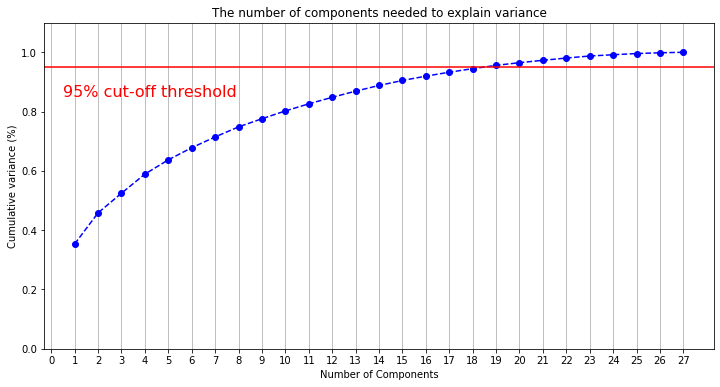

In [133]:
# From the Scikit-learn implementation, we can get the information about the explained variance and plot the cumulative variance.

import numpy as np

pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 28, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 28, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [134]:
# From the graph above, we see that the first 18 or so components capture 95% of the explained variance. And I can already see that the first 2 components will capture less than 50% of the explained vaariance. Hmm.

from sklearn.decomposition import PCA

# scikit-learn workflow:
# Step 1. create and configure the model:
pca = PCA(n_components=18)

# Step 2. fit the model to the data
pca.fit(X_staining)

PCA(n_components=18)

In [135]:
print(pca.components_)

[[-2.02715849e-02 -3.33637150e-01 -1.53868053e-01 -8.63559430e-03
  -3.07741936e-01 -1.42058861e-02 -1.57981887e-02 -2.37695976e-01
  -1.45315829e-02 -2.32116692e-01 -2.95633673e-02 -3.20715556e-01
  -3.18583558e-01 -2.45363486e-01 -2.08073132e-01 -2.61293370e-01
  -3.35355014e-01 -3.31174538e-01  8.58492566e-03 -7.64980069e-02
  -1.30590315e-01 -1.07986794e-02 -5.63889826e-02  1.74120127e-01
  -2.30361443e-03  2.46028559e-02  4.93613513e-02]
 [ 1.56814159e-02  2.10798637e-01  1.18048295e-02  1.55177284e-02
   1.84856659e-01 -1.31084077e-01  4.94848105e-01  3.97659049e-01
  -7.26659240e-02 -2.95787102e-01  4.44359368e-02  1.62773399e-01
   1.38148369e-01 -3.72376686e-01 -8.83762695e-02 -7.82037532e-02
   4.80028902e-02 -2.00999702e-01  1.49844801e-01 -1.79040667e-01
  -5.41586590e-02  2.18085760e-02 -1.32463582e-02  3.15910601e-01
  -7.02816876e-03  7.07839011e-02 -4.47455402e-02]
 [-1.64570734e-02  2.16071703e-02 -1.30485424e-01  5.38196548e-02
   1.10960738e-01  9.86679850e-02  1.104

In [136]:
import numpy as np

%matplotlib inline

In [137]:
# The principal components are all unit (length 1) vectors and they are 
#  orthogonal (perpendicular) to one another. Here we test that a bit.

print('The length of the first principal component is',np.linalg.norm(pca.components_[0]))
print('The dot product of the first and second principal components is',
    np.dot( pca.components_[0], pca.components_[1] ))

The length of the first principal component is 0.9999999999999993
The dot product of the first and second principal components is 1.457167719820518e-16


In [138]:
print('The fraction of the total variance explained by each component is:', pca.explained_variance_ratio_)
print('The total explained variance is :', np.sum(pca.explained_variance_ratio_))

The fraction of the total variance explained by each component is: [0.35228655 0.10499127 0.0671858  0.06637521 0.04816503 0.04097941
 0.03630737 0.0341973  0.02752369 0.02623194 0.02386128 0.02192965
 0.02050913 0.01914018 0.01681722 0.01471063 0.01321556 0.01171242]
The total explained variance is : 0.946139637033788


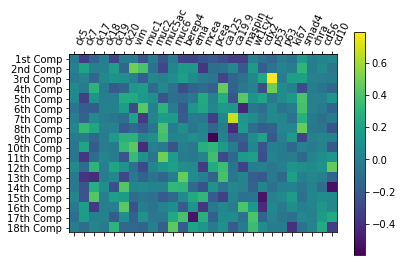

In [152]:
# Here I am just curious as to how the features mixed up to create the components
# source: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
# This is not super relevant to my question and it is difficult to interpret, but I can get a sense of which features contributed the most to the 1st PC

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp','7th Comp','8th Comp','9th Comp','10th Comp','11th Comp','12th Comp','13th Comp','14th Comp','15th Comp','16th Comp','17th Comp','18th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_staining.columns)),X_staining,rotation=65,ha='left')
plt.show()

In [139]:
# Step 3. Apply the model to 'transform' the data, in this case by mapping the input feature matrix onto the principal components

X_pca = pca.transform(X_staining)
X_pca.shape


(409, 18)

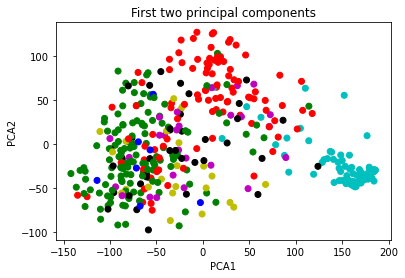

In [140]:
# Now the first two columns of X_pca represent the axes of greatest variation, so we can plot just those and retain the max info
# Although, they don't even contain the majority of the explained variance


plt.scatter( X_pca[:,0], X_pca[:,1], c=staining['color'] )
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2');

In [142]:
# Now I want to refine these results, so we can rescale the data to normalize all columns to have mean 0 and standard deviation 1

from sklearn.preprocessing import StandardScaler

# Step 1: create the sklearn object
scaler = StandardScaler()
scaler

StandardScaler()

In [143]:
# Step 2: fit the model
scaler.fit( X_staining )
print('mean:', scaler.mean_)
print('variance:', scaler.var_)

mean: [ 4.01184655 65.24837001 19.68792933 89.92419325 76.18999593 10.05086933
 19.81949538 49.12498302  3.22074262 29.94934655  9.72738629 63.68904995
 72.14613653 29.99985447 73.16934694 29.07090465 53.91081616 48.06579152
  7.67552247 14.44557768 30.92281795  2.85861179 33.87468953 60.10128524
  0.94274654  4.53934053 12.02111053]
variance: [ 134.6335673  1509.24976341  764.98001009  109.58398182 1141.19114981
  589.67089891 1081.82773695 1447.56244449  152.55094821 1212.18155233
  348.03430379 1382.28631067 1141.77474205 1217.46648502  959.20397068
 1380.47799345 1630.48624078 1609.28378862  337.38862214  694.75708011
 1542.81231235  120.86406831  349.06163405 1298.83545119   44.72683879
  239.86813675  488.66369835]


In [144]:
# Step 3: apply the fitted model to transform the data 
X_staining_scaled = scaler.transform( X_staining )

# check the mean, std-dev of the first column
print( np.mean( X_staining_scaled[:,0]), np.std( X_staining_scaled[:,0]))


-1.1400823235759554e-17 0.9999999999999999


In [163]:
# Step 1: create PCA model
pca2 = PCA(n_components=18)

# Step 2: solve for PCs
pca2.fit(X_staining_scaled)

# Step 3: transform the data to the new PC coordinate system
X_pca2 = pca2.transform( X_staining_scaled )

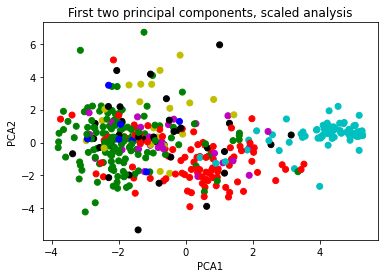

In [165]:
#Plot our scaled data and notice that only the control group sort of clusters!
plt.scatter( X_pca2[:,0], X_pca2[:,1], c=staining['color'] )
plt.title('First two principal components, scaled analysis')
plt.xlabel('PCA1')
plt.ylabel('PCA2');

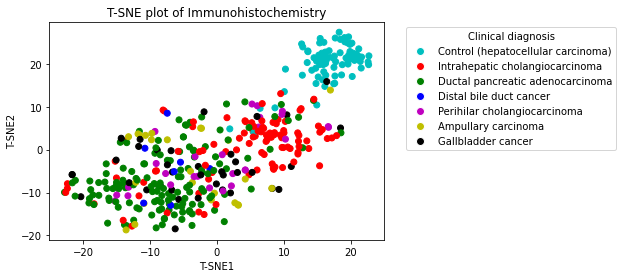

In [237]:
from sklearn.manifold import TSNE

# here I create the TSNE object with name tsne:
tsne = TSNE()

# here I combine the fit and transform steps to fit the data to the model and transform into a new array:
X_tsne = tsne.fit_transform(X_staining_scaled)

# matplotlib to make a scatter plot of the 2 components with kmeans cluster assignments:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=staining['color'])

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Control (hepatocellular carcinoma)',
                        markerfacecolor='c', markersize=8), Line2D([0], [0], marker='o', color='w', label='Intrahepatic cholangiocarcinoma',
                        markerfacecolor='r', markersize=8), Line2D([0], [0], marker='o', color='w', label='Ductal pancreatic adenocarcinoma',
                        markerfacecolor='g', markersize=8), Line2D([0], [0], marker='o', color='w', label='Distal bile duct cancer',
                        markerfacecolor='b', markersize=8), Line2D([0], [0], marker='o', color='w', label='Perihilar cholangiocarcinoma',
                        markerfacecolor='m', markersize=8), Line2D([0], [0], marker='o', color='w', label='Ampullary carcinoma',
                        markerfacecolor='y', markersize=8), Line2D([0], [0], marker='o', color='w', label='Gallbladder cancer',
                        markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), title="Clinical diagnosis")

plt.title('T-SNE plot of Immunohistochemistry')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')

plt.show()

#saved the figure as 'question3.png' located in 'figures' directory


## Results explained

Similar to the approach used in the paper, I employed principal component analysis to investigate the set of analyzed immunohistochemical markers as a potential confounding factor. In the staining dataset, I found that the set of analyzed immunohistochemical markers is not a confounding factor, because the control group (hepatocellular carcinoma) showed evidence of clustering, while the other tumor types did not. I then used scikit-learn to project the dataset down into 2 dimensions as a TSNE plot. Even in the lower dimension, while the control "cluster" is more evident, the other tumor types show an admixture.